# Energy Consumption Problem

by Emine Kesici

## Overview

https://www.kaggle.com/competitions/widsdatathon2022/overview/description

> **Background:**
Climate change is a globally relevant, urgent, and multi-faceted issue heavily impacted by energy policy and infrastructure. Addressing climate change involves mitigation (i.e. mitigating greenhouse gas emissions) and adaptation (i.e. preparing for unavoidable consequences). Mitigation of GHG emissions requires changes to electricity systems, transportation, buildings, industry, and land use.
According to a report issued by the International Energy Agency (IEA), the lifecycle of buildings from construction to demolition were responsible for 37% of global energy-related and process-related CO2 emissions in 2020. Yet it is possible to drastically reduce the energy consumption of buildings by a combination of easy-to-implement fixes and state-of-the-art strategies. For example, retrofitted buildings can reduce heating and cooling energy requirements by 50-90 percent. Many of these energy efficiency measures also result in overall cost savings and yield other benefits, such as cleaner air for occupants. This potential can be achieved while maintaining the services that buildings provide.

> **Overview: the dataset and challenge:**
The WiDS Datathon dataset was created in collaboration with Climate Change AI (CCAI) and Lawrence Berkeley National Laboratory (Berkeley Lab). WiDS Datathon participants will *analyze differences in building energy efficiency, creating models to predict building energy consumption.* Participants will use a dataset consisting of variables that describe building characteristics and climate and weather variables for the regions in which the buildings are located. Accurate predictions of energy consumption can help policymakers target retrofitting efforts to maximize emissions reductions.

> **Evaluation Metric:**
The evaluation metric for this competition is Root Mean Squared Error (RMSE). The RMSE is commonly used measure of the differences between predicted values provided by a model and the actual observed values. The dataset consists of building characteristics (e.g. floor area, facility type etc), weather data for the location of the building (e.g. annual average temperature, annual total precipitation etc) as well as the energy usage for the building and the given year, measured as Site Energy Usage Intensity (Site EUI). Each row in the data corresponds to the a single building observed in a given year. Your task is to predict the Site EUI for each row, given the characteristics of the building and the weather data for the location of the building. 

## Summary of Business Understanding

**End Users:** US policymakers to help them reduce emissions. 

**True business problem:**
-  Predicting building energy consumptions (Deliverable: Model)
-  Analyze differences in building energy efficiency (Deliverable: Analysis)

**Metric:** RMSE score

In [1]:
# Importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data preperation libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# To visualize the 100 many the columns in data
pd.options.display.max_columns=100

import warnings
warnings.filterwarnings("ignore")

In [2]:
!ls data

Data_dictionary.txt
train.csv


## Data Understanding

In [3]:
df = pd.read_csv('data/train.csv')
df

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.500000,68,35,50.589286,73,40,53.693548,80,41,55.500000,78,46,56.854839,84,50,60.500000,90,52,62.725806,84,52,62.161290,85,52,64.650000,90,47,63.016129,83,43,53.800000,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.500000,68,35,50.589286,73,40,53.693548,80,41,55.500000,78,46,56.854839,84,50,60.500000,90,52,62.725806,84,52,62.161290,85,52,64.650000,90,47,63.016129,83,43,53.800000,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.500000,68,35,50.589286,73,40,53.693548,80,41,55.500000,78,46,56.854839,84,50,60.500000,90,52,62.725806,84,52,62.161290,85,52,64.650000,90,47,63.016129,83,43,53.800000,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.500000,68,35,50.589286,73,40,53.693548,80,41,55.500000,78,46,56.854839,84,50,60.500000,90,52,62.725806,84,52,62.161290,85,52,64.650000,90,47,63.016129,83,43,53.800000,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.500000,68,35,50.589286,73,40,53.693548,80,41,55.500000,78,46,56.854839,84,50,60.500000,90,52,62.725806,84,52,62.161290,85,52,64.650000,90,47,63.016129,83,43,53.800000,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75752,6,State_11,Commercial,Office_Uncategorized,20410.0,1995.0,8.0,36.6,28,43.451613,56,34,47.672414,64,35,49.354839,71,40,56.266667,89,45,59.193548,88,47,63.566667,91,54,66.951613,87,52,68.612903,91,44,61.383333,79,39,55.403226,68,40,51.283333,71,24,38.532258,51,260,3772,45.03,1.4,1,55.147541,6,0,0,0,25,3,0,0,NaN,NaN,NaN,NaN,132.918411,75752
75753,6,State_11,Residential,5plus_Unit_Building,40489.0,1910.0,98.0,36.6,28,43.451613,56,34,47.672414,64,35,49.354839,71,40,56.266667,89,45,59.193548,88,47,63.566667,91,54,66.951613,87,52,68.612903,91,44,61.383333,79,39,55.403226,68,40,51.283333,71,24,38.532258,51,260,3772,45.03,1.4,1,55.147541,6,0,0,0,25,3,0,0,NaN,NaN,NaN,NaN,39.483672,75753
75754,6,State_11,Commercial,Commercial_Other,28072.0,1917.0,NaN,36.6,26,36.612903,48,30,41.637931,58,29,41.338710,62,34,50.183333,79,40,52.145161,79,41,56.233333,86,48,58.758065,81,48,61.612903,87,41,53.783333,73,37,47.661290,59,34,44.650000,62,15,30.338710,46,55,6218,106.32,36.6,438,47.911202,26,2,0,0,6,0,0,0,NaN,NaN

In [4]:
df.shape

(75757, 64)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

In [6]:
print('Missing value counts:')
for i in df.columns:
    if df[i].isna().sum() != 0:
        print(i, df[i].isna().sum())
        print('NaN percent: ', df[i].isna().sum()/len(df[i]))
        print('Value counts:', '\n',
              df[i].value_counts().sort_index())
        print('\n')

Missing value counts:
year_built 1837
NaN percent:  0.024248584289240597
Value counts: 
 0.0         6
1600.0      6
1649.0      4
1732.0      1
1756.0      4
         ... 
2011.0    279
2012.0    353
2013.0    398
2014.0    269
2015.0    111
Name: year_built, Length: 180, dtype: int64


energy_star_rating 26709
NaN percent:  0.352561479467244
Value counts: 
 0.0         1
1.0       985
2.0       361
3.0       311
4.0       306
         ... 
96.0      634
97.0      633
98.0      651
99.0      709
100.0    1946
Name: energy_star_rating, Length: 101, dtype: int64


direction_max_wind_speed 41082
NaN percent:  0.5422865213775625
Value counts: 
 1.0      27724
270.0       12
280.0       22
300.0        7
310.0     2439
320.0       49
330.0     3011
340.0        1
350.0      485
360.0      925
Name: direction_max_wind_speed, dtype: int64


direction_peak_wind_speed 41811
NaN percent:  0.5519093945113983
Value counts: 
 1.0      27699
270.0       12
310.0     1260
320.0      491
330.0      1

In [7]:
# Find the columns with missing values and non missing values:
missing_val_columns = [c for c in df.columns if df[c].isna().sum() != 0]
non_missing_columns = [c for c in df.columns if df[c].isna().sum() == 0]

In [8]:
# Exploring all numerical columns
df.describe()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
count,75757.000000,7.575700e+04,73920.000000,49048.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,34675.000000,33946.000000,34675.000000,29961.000000,75757.000000,75757.000000
mean,4.367755,1.659839e+05,1952.306764,61.048605,39.506323,11.432343,34.310468,59.054952,11.720567,35.526837,58.486278,21.606281,44.469292,70.897831,32.037171,53.784863,82.661932,44.706179,63.742547,88.987856,51.131763,71.066384,91.400280,60.571604,76.596879,95.543950,58.515068,75.348749,92.572581,50.791689,69.597545,92.171139,38.210911,58.727038,81.135671,28.630397,48.123133,71.202397,22.736777,41.625569,64.496852,1202.250446,4324.957390,42.430651,29.136379,164.862455,56.176705,48.756511,17.447932,4.886532,0.876764,82.709809,14.058701,0.279539,0.002442,66.552675,62.779974,4.190601,109.142051,82.584693,37878.000000
std,1.471441,2.468758e+05,37.053619,28.663683,60.656596,9.381027,6.996108,5.355458,12.577272,8.866697,8.414611,10.004303,6.657142,7.680982,5.577279,2.500473,4.101028,4.200319,2.792919,2.864669,3.415926,2.861681,3.604068,4.177109,4.090275,4.157118,4.441992,3.818895,4.139685,4.290884,3.603773,5.011708,5.093899,2.641300,5.579513,7.153244,4.094207,4.373374,9.014047,5.869386,6.054104,391.561780,824.366727,10.592205,17.810894,175.275869,2.241940,27.587124,14.469435,7.071221,2.894244,25.282913,10.943996,2.252323,0.142140,131.147834,130.308106,6.458789,50.699751,58.255403,21869.306509
min,1.000000,9.430000e+02,0.000000,0.000000,-6.400000,-19.000000,10.806452,42.000000,-13.000000,13.250000,38.000000,-9.000000,25.854839,53.000000,15.000000,40.280000,62.000000,23.000000,46.950000,64.000000,30.000000,54.100000,67.000000,37.000000,54.822581,65.000000,31.000000,56.693548,66.000000,26.000000,53.600000,64.000000,18.000000,44.693548,59.000000,4.000000,30.766667,53.000000,-16.000000,23.790323,42.000000,0.000000,398.000000,0.000000,0.000000,0.000000,44.512329,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,12.000000,1.001169,0.000000
25%,3.000000,6.237900e+04,1927.000000,40.000000,11.900000,6.000000,29.827586,56.000000,2.000000,31.625000,55.000000,13.000000,38.096774,62.000000,26.000000,52.333333,80.000000,42.000000,62.790323,88.000000,50.000000,70.983333,89.000000,57.000000,76.145161,95.000000,57.000000,74.516129,90.000000,47.000000,68.200000,91.000000,35.000000,58.048387,78.000000,23.000000,45.250000,69.000000,17.000000,38.532258,60.000000,1128.000000,3978

In [9]:
# Exploring numerical cols with missing values: 
df[missing_val_columns].describe()

,year_built,energy_star_rating,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog
count,73920.000000,49048.000000,34675.000000,33946.000000,34675.000000,29961.000000
mean,1952.306764,61.048605,66.552675,62.779974,4.190601,109.142051
std,37.053619,28.663683,131.147834,130.308106,6.458789,50.699751
min,0.000000,0.000000,1.000000,1.000000,1.000000,12.000000
25%,1927.000000,40.000000,1.000000,1.000000,1.000000,88.000000
50%,1951.000000,67.000000,1.000000,1.000000,1.000000,104.000000
75%,1977.000000,85.000000,1.000000,1.000000,1.000000,131.000000
max,2015.000000,100.000000,360.000000,360.000000,23.300000,311.000000


In [10]:
# Look into numerical cols with no missing values: 
df[non_missing_columns].describe()

,Year_Factor,floor_area,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,site_eui,id
count,75757.000000,7.575700e+04,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000
mean,4.367755,1.659839e+05,39.506323,11.432343,34.310468,59.054952,11.720567,35.526837,58.486278,21.606281,44.469292,70.897831,32.037171,53.784863,82.661932,44.706179,63.742547,88.987856,51.131763,71.066384,91.400280,60.571604,76.596879,95.543950,58.515068,75.348749,92.572581,50.791689,69.597545,92.171139,38.210911,58.727038,81.135671,28.630397,48.123133,71.202397,22.736777,41.625569,64.496852,1202.250446,4324.957390,42.430651,29.136379,164.862455,56.176705,48.756511,17.447932,4.886532,0.876764,82.709809,14.058701,0.279539,0.002442,82.584693,37878.000000
std,1.471441,2.468758e+05,60.656596,9.381027,6.996108,5.355458,12.577272,8.866697,8.414611,10.004303,6.657142,7.680982,5.577279,2.500473,4.101028,4.200319,2.792919,2.864669,3.415926,2.861681,3.604068,4.177109,4.090275,4.157118,4.441992,3.818895,4.139685,4.290884,3.603773,5.011708,5.093899,2.641300,5.579513,7.153244,4.094207,4.373374,9.014047,5.869386,6.054104,391.561780,824.366727,10.592205,17.810894,175.275869,2.241940,27.587124,14.469435,7.071221,2.894244,25.282913,10.943996,2.252323,0.142140,58.255403,21869.306509
min,1.000000,9.430000e+02,-6.400000,-19.000000,10.806452,42.000000,-13.000000,13.250000,38.000000,-9.000000,25.854839,53.000000,15.000000,40.280000,62.000000,23.000000,46.950000,64.000000,30.000000,54.100000,67.000000,37.000000,54.822581,65.000000,31.000000,56.693548,66.000000,26.000000,53.600000,64.000000,18.000000,44.693548,59.000000,4.000000,30.766667,53.000000,-16.000000,23.790323,42.000000,0.000000,398.000000,0.000000,0.000000,0.000000,44.512329,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.001169,0.000000
25%,3.000000,6.237900e+04,11.900000,6.000000,29.827586,56.000000,2.000000,31.625000,55.000000,13.000000,38.096774,62.000000,26.000000,52.333333,80.000000,42.000000,62.790323,88.000000,50.000000,70.983333,89.000000,57.000000,76.145161,95.000000,57.000000,74.516129,90.000000,47.000000,68.200000,91.000000,35.000000,58.048387,78.000000,23.000000,45.250000,69.000000,17.000000,38.532258,60.000000,1128.000000,3978.000000,39.350000,9.600000,10.000000,55.147541,22.000000,5.000000,0.000000,0.000000,72.000000,6.000000,0.000000,0.000000,54.528601,18939.000000
50%,5.000000,9.136700e+04,25.000000,11.000000,34.451613,59.000000,9.000000,34.107143,61.000000,25.000000,44.516129,71.000000,32.000000,53.333333,82.000000,45.000000,62.887097,89.000000,52.000000,72.250000,90.000000,63.000000,78.677419,96.000000

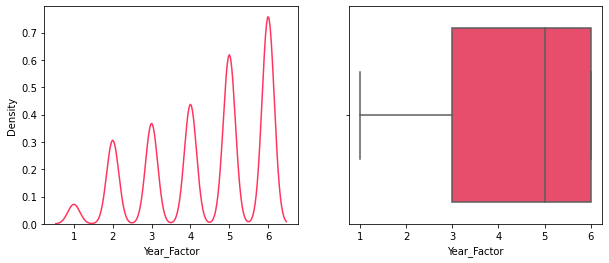

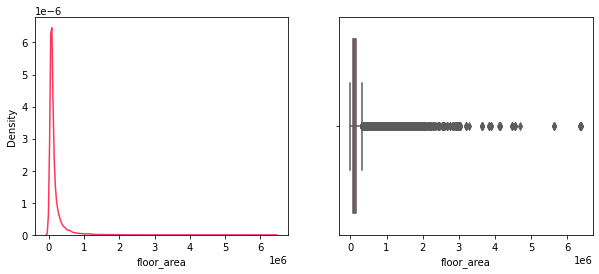

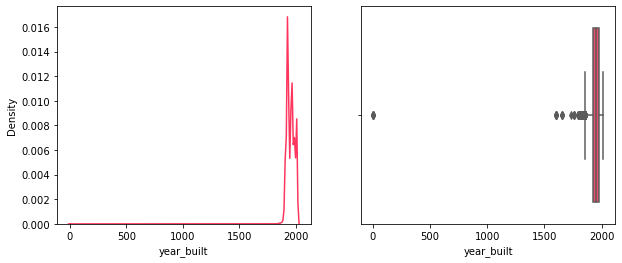

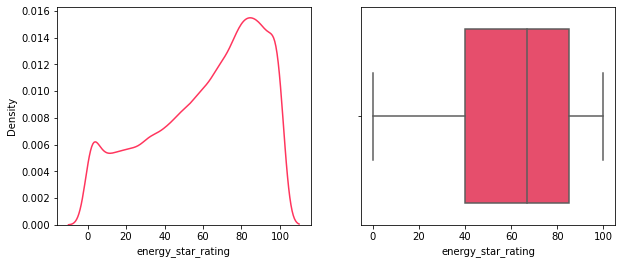

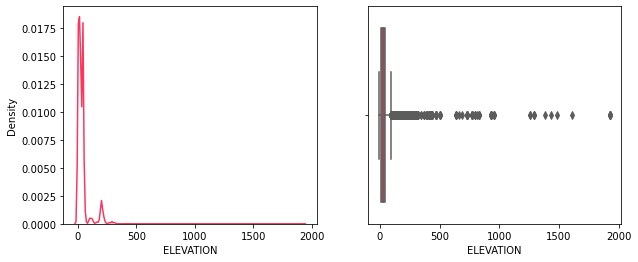

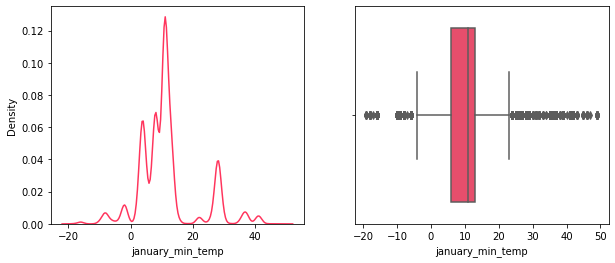

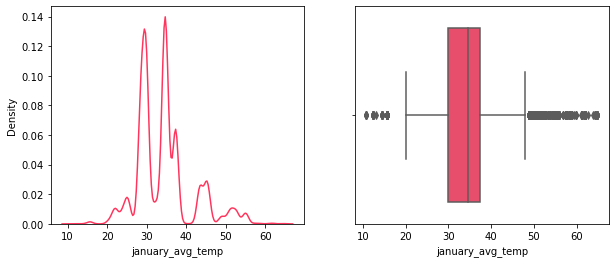

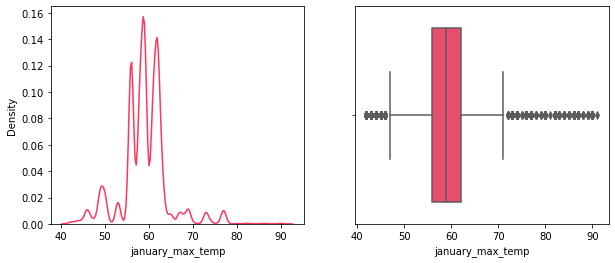

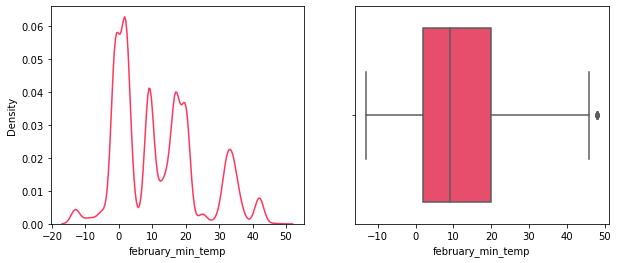

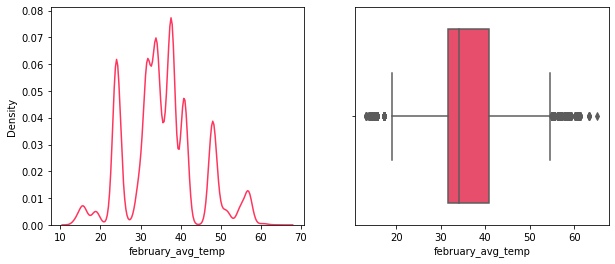

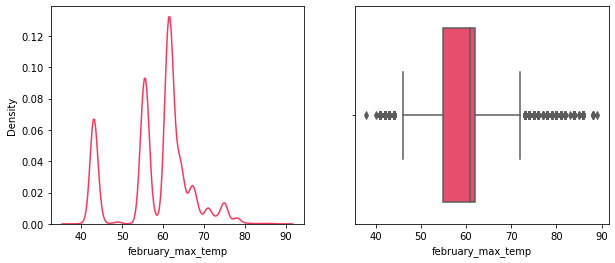

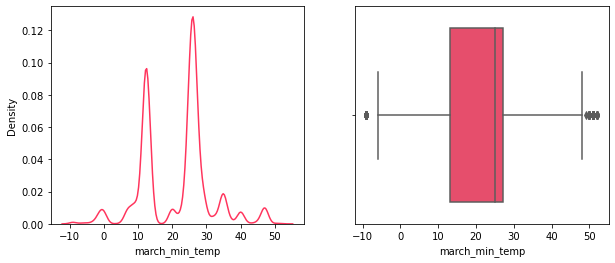

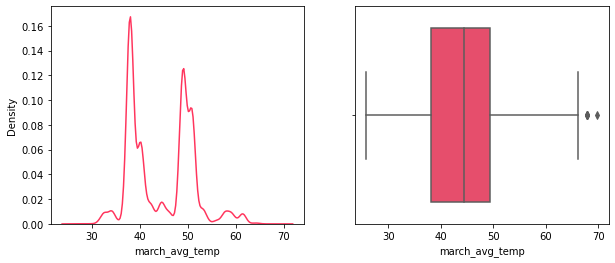

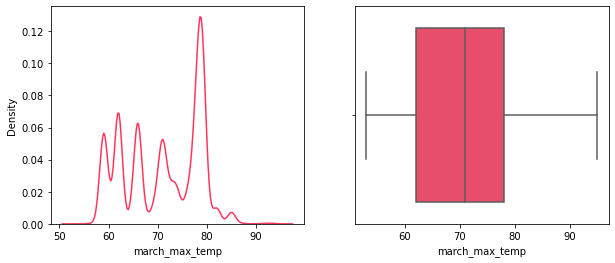

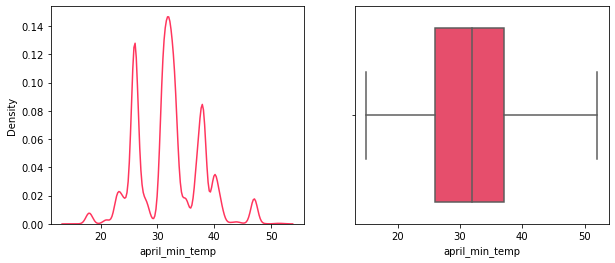

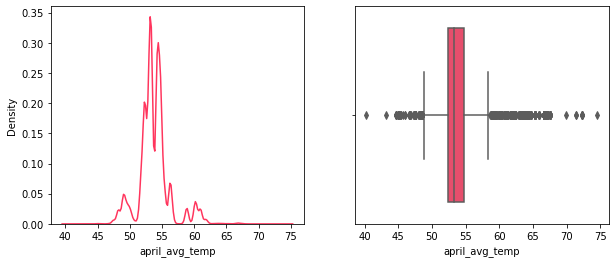

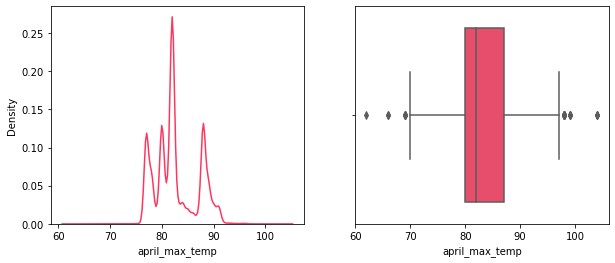

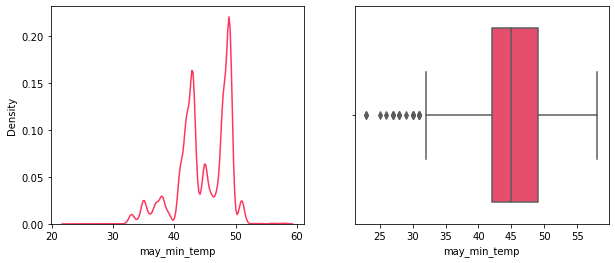

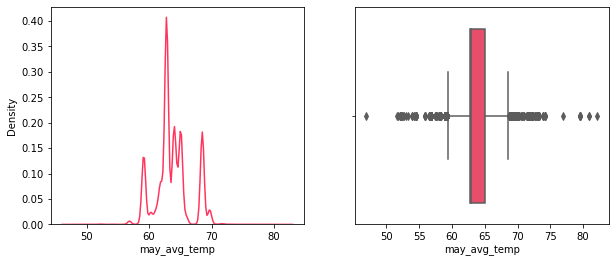

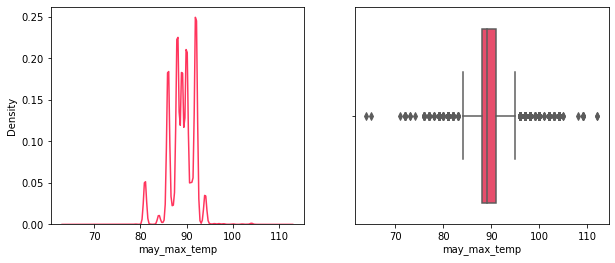

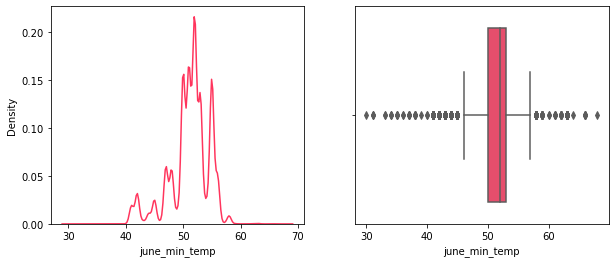

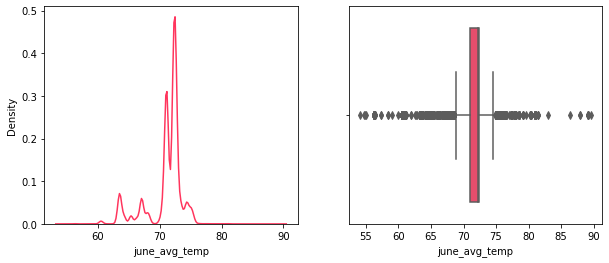

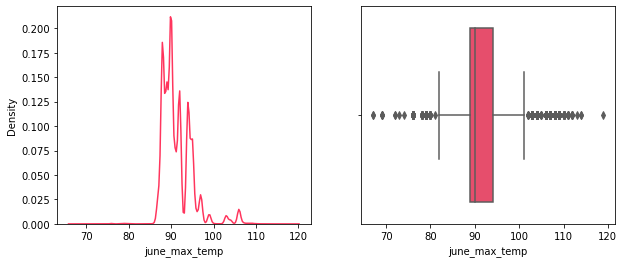

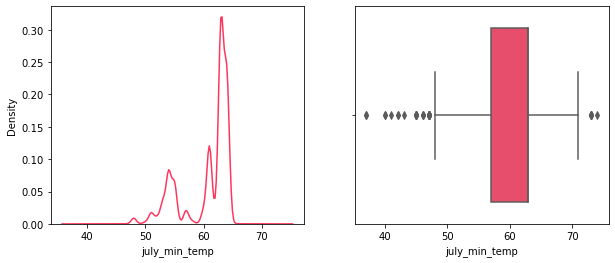

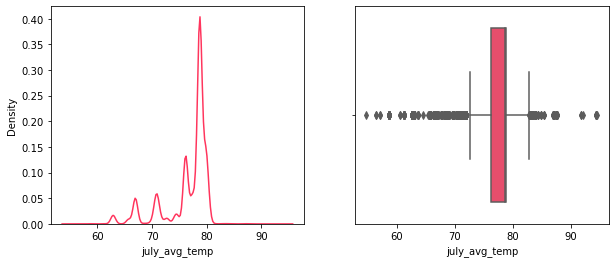

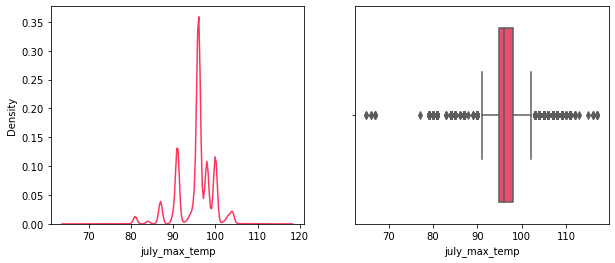

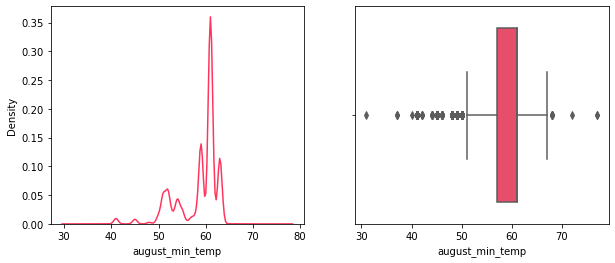

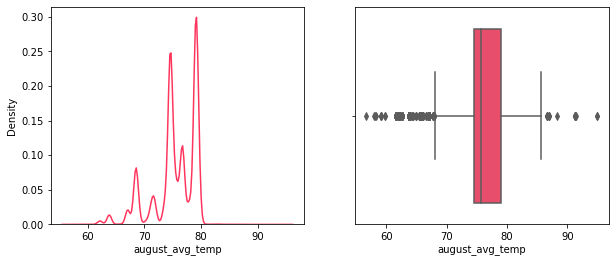

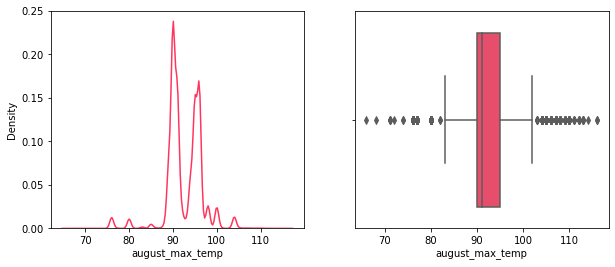

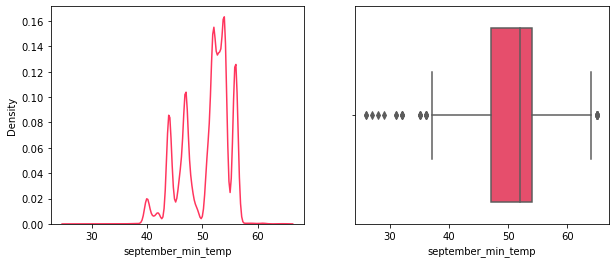

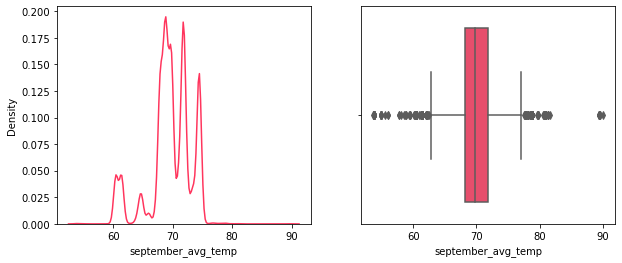

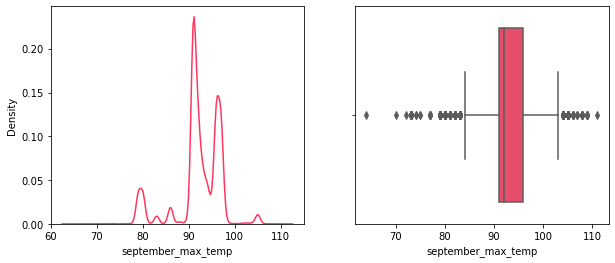

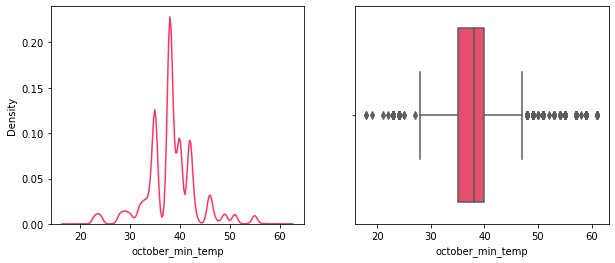

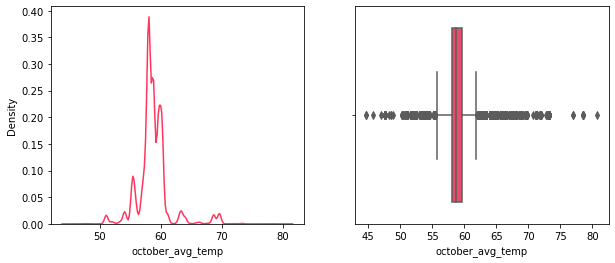

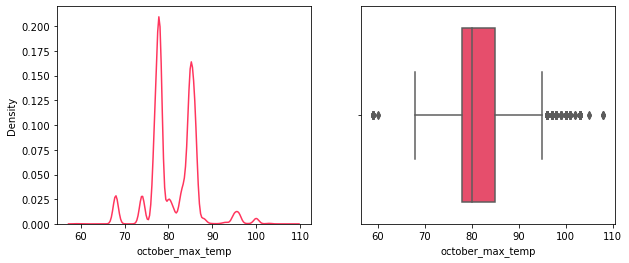

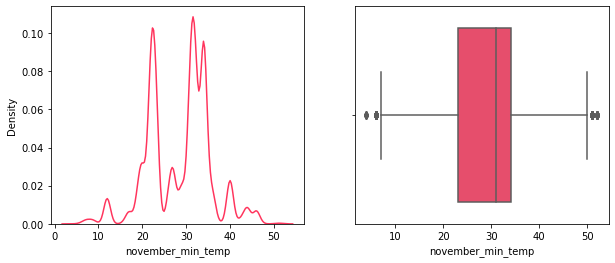

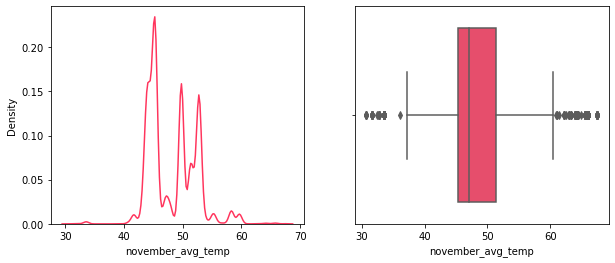

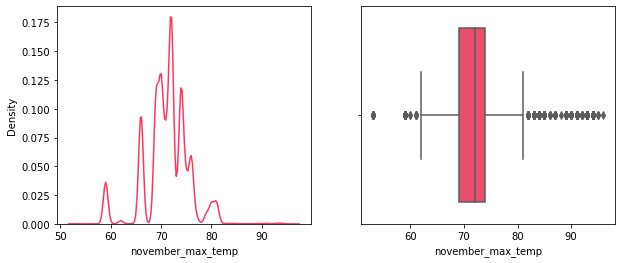

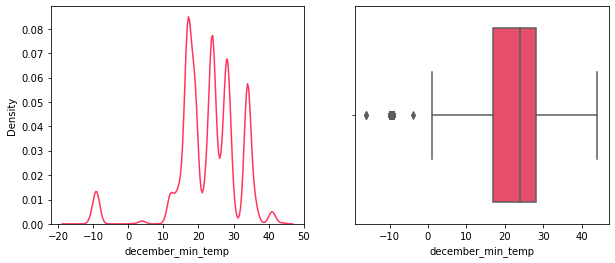

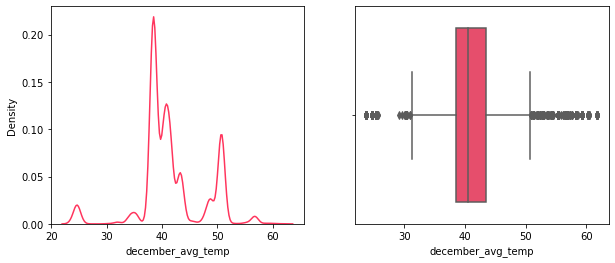

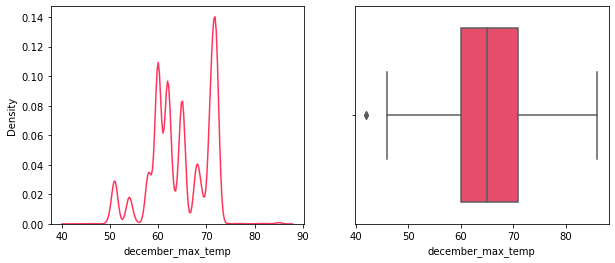

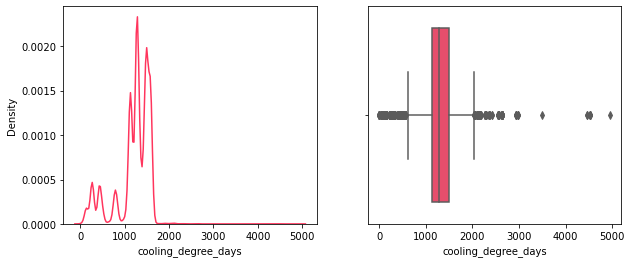

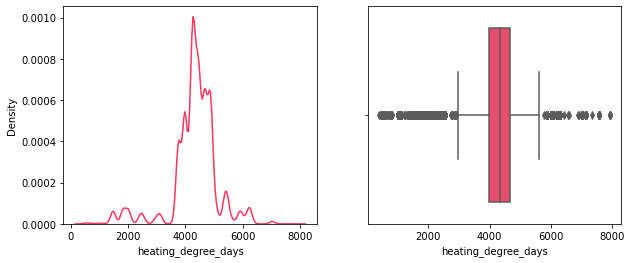

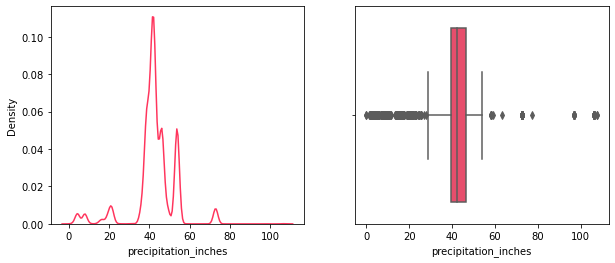

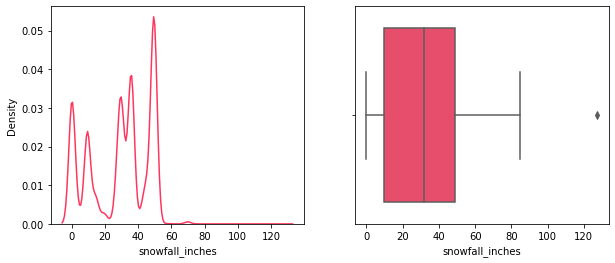

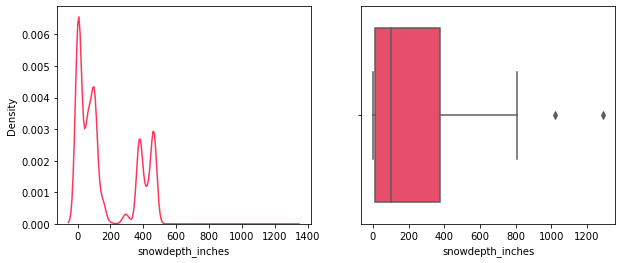

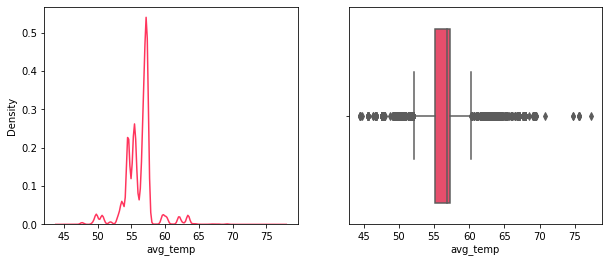

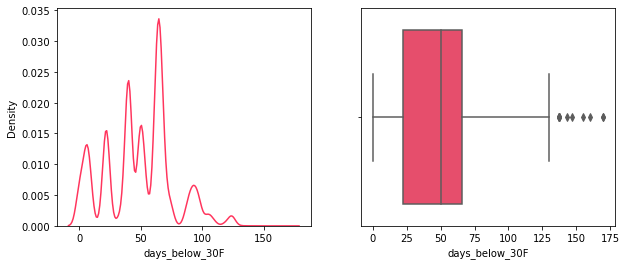

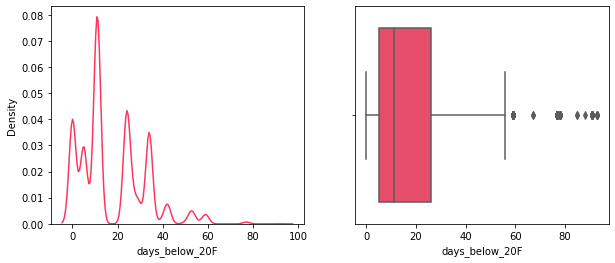

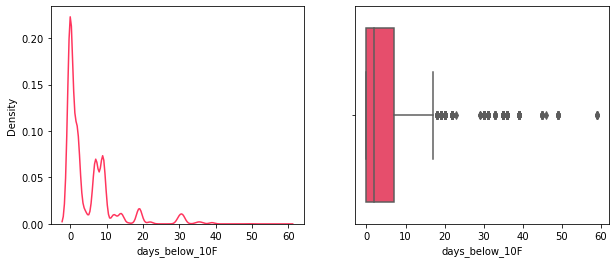

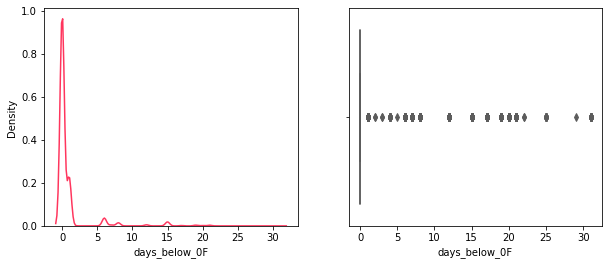

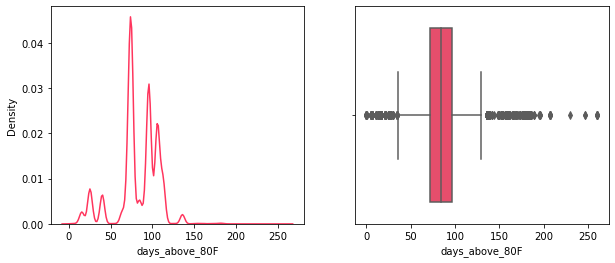

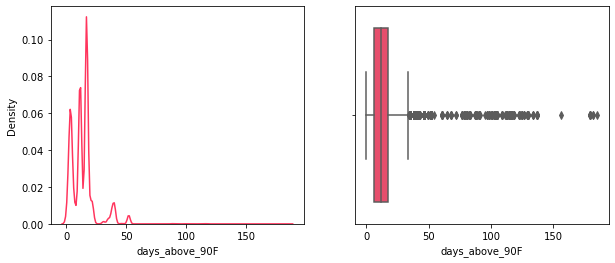

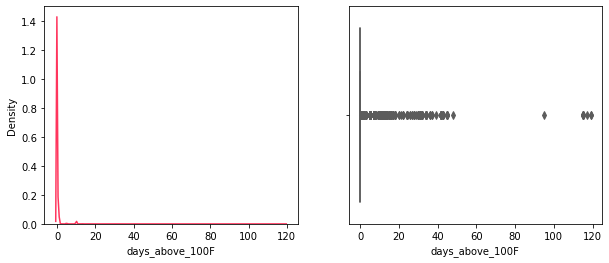

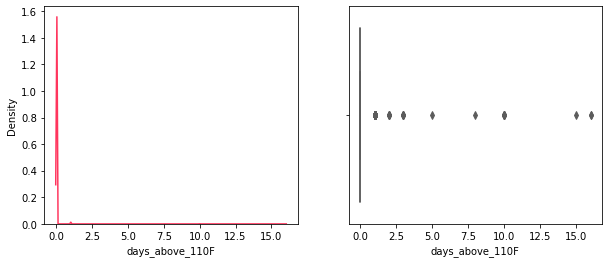

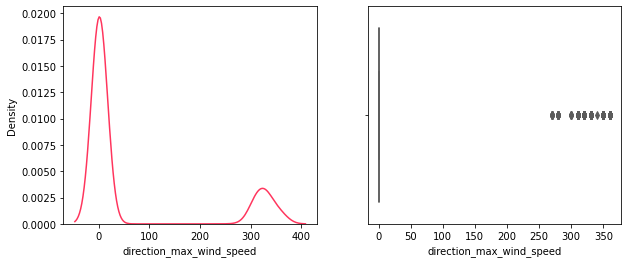

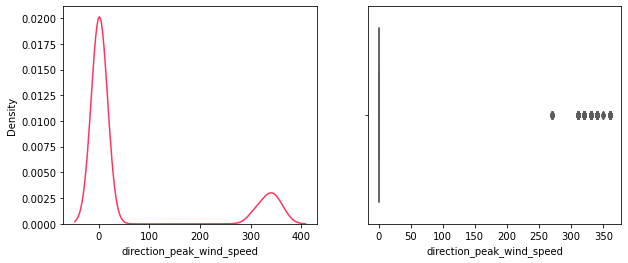

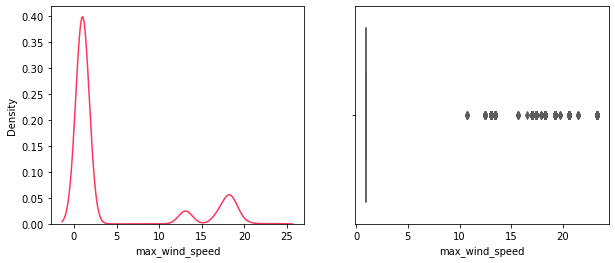

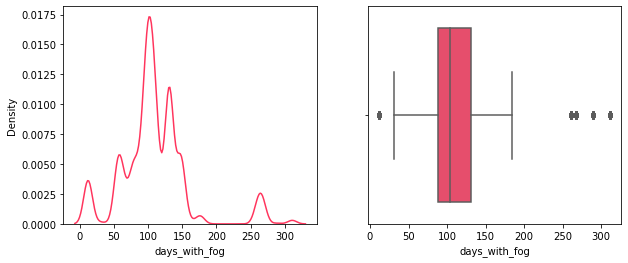

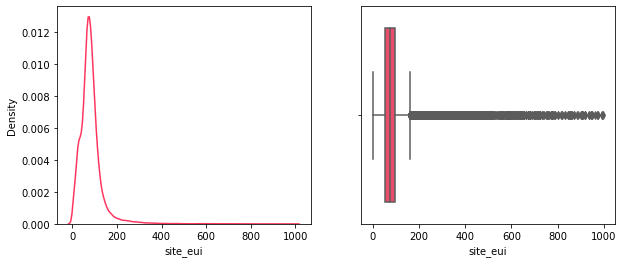

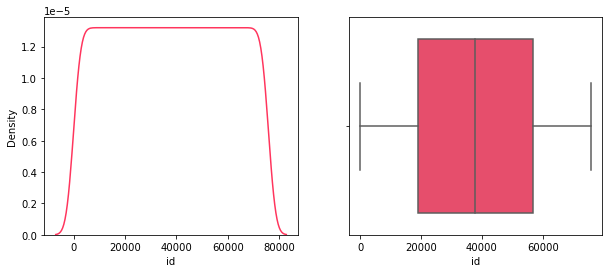

In [11]:
# Visualizing numerical column distributions and corresponding boxplots: 
numerical = df.select_dtypes('number').columns
for col in numerical:
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    sns.kdeplot(data=df, x=col, ax=ax[0], color = '#ff355d')
    sns.boxplot(data=df, x=col, ax=ax[1], color = '#ff355d');

In [12]:
categorical_columns = df[[c for c in df.columns if df[c].dtype =='object']]

In [13]:
# Exploring all object columns:
categorical_columns.describe()

,State_Factor,building_class,facility_type
count,75757,75757,75757
unique,7,2,60
top,State_6,Residential,Multifamily_Uncategorized
freq,50840,43558,39455


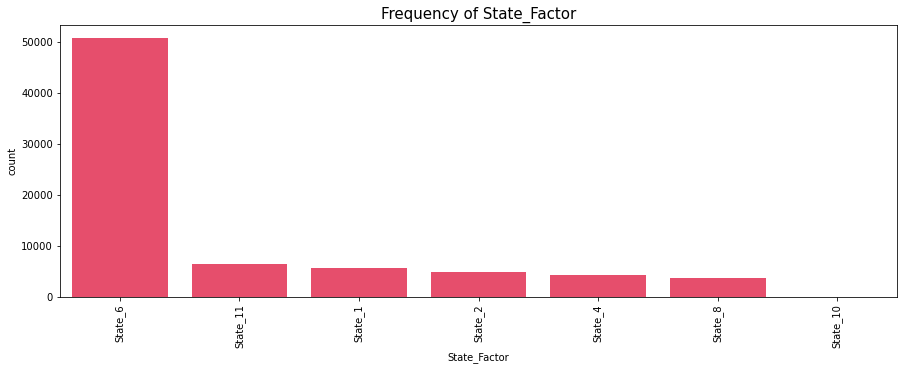

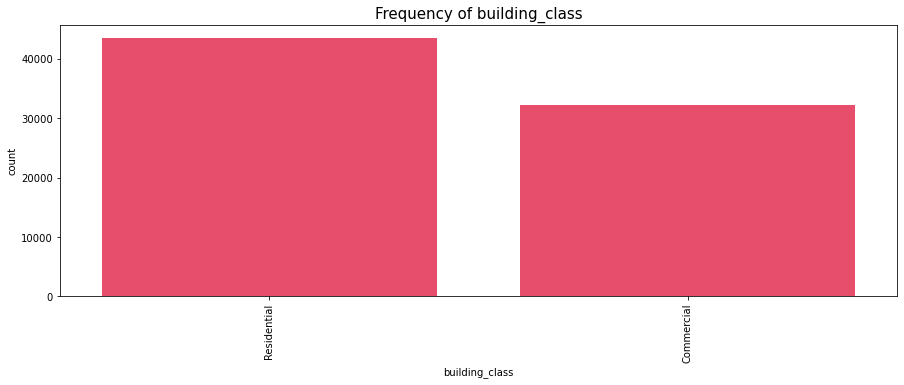

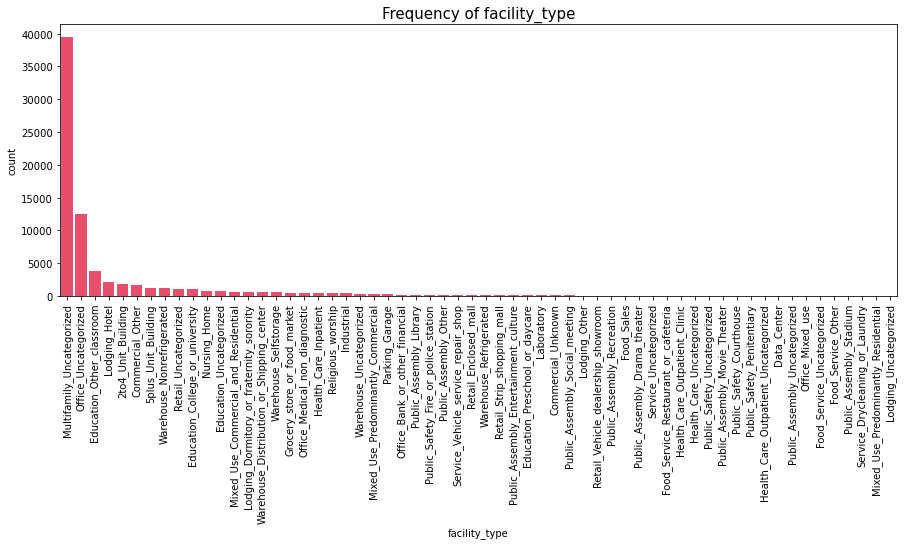

In [14]:
# plot distributions of categorical features
for col in categorical_columns:
    plt.figure(figsize = (15, 5))
    sns.countplot(df[col], color = '#ff355d', order = df[col].value_counts().index)
    plt.title('Frequency of '+ col, fontsize=15)
    plt.xticks(rotation=90)
    plt.show();

In [15]:
df['facility_type'].value_counts()

Multifamily_Uncategorized                    39455
Office_Uncategorized                         12512
Education_Other_classroom                     3860
Lodging_Hotel                                 2098
2to4_Unit_Building                            1893
Commercial_Other                              1744
5plus_Unit_Building                           1273
Warehouse_Nonrefrigerated                     1255
Retail_Uncategorized                          1130
Education_College_or_university               1056
Nursing_Home                                   772
Education_Uncategorized                        709
Mixed_Use_Commercial_and_Residential           672
Lodging_Dormitory_or_fraternity_sorority       669
Warehouse_Distribution_or_Shipping_center      604
Warehouse_Selfstorage                          577
Grocery_store_or_food_market                   448
Office_Medical_non_diagnostic                  447
Health_Care_Inpatient                          409
Religious_worship              

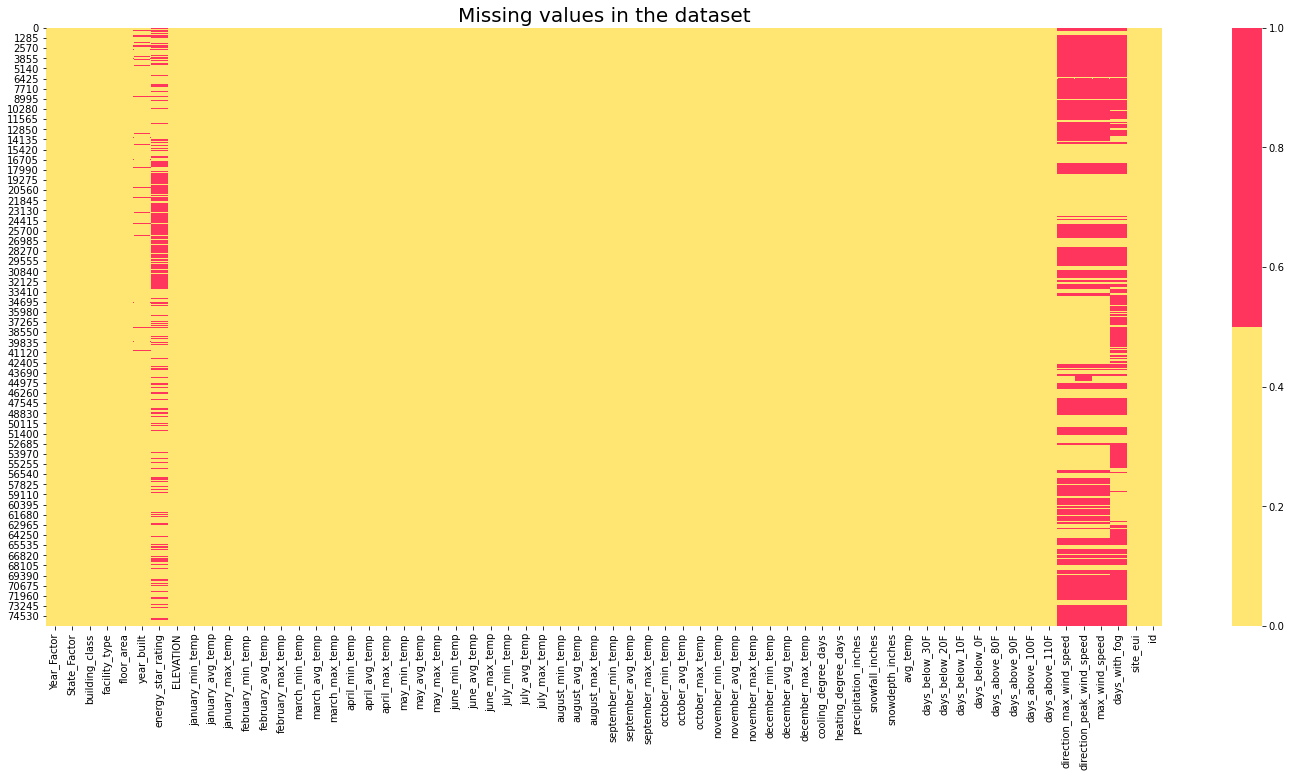

In [16]:
plt.figure(figsize = (25,11))
sns.heatmap(df.isna().values, cmap = ['#ffe572','#ff355d'], xticklabels=df.columns)
plt.title("Missing values in the dataset", size=20);

Strategy for replacing missing values:
1. 'year built': replace with current year (2022), and drop rows with 0.0 values.
2. 'energy_star_rating': replace with mean, and drop rows with 0.0 values.
3. 'direction_max_wind_speed': replace with zero 
4. 'direction_peak_wind_speed': replace with zero
5. 'max_wind_speed': replace with zero
6. 'days with fog': replace with zero

## Exploratory Data Analysis

### Commercial Facility Type Energy Usage

In [17]:
temp = df[['building_class', 'facility_type', 'site_eui']]
commercial_temp = temp[temp['building_class'] == 'Commercial']
comm_temp = commercial_temp.groupby("facility_type")['site_eui'].agg('median').reset_index().sort_values(by = ['site_eui'], 
                                                                                                              ascending = False).head(10)
comm_temp

,facility_type,site_eui
2,Data_Center,309.153006
17,Laboratory,306.253447
11,Grocery_store_or_food_market,242.057079
12,Health_Care_Inpatient,220.370223
9,Food_Service_Restaurant_or_cafeteria,189.552794
39,Public_Safety_Penitentiary,157.428055
35,Public_Assembly_Stadium,145.136627
15,Health_Care_Uncategorized,139.218579
7,Food_Sales,130.384728
38,Public_Safety_Fire_or_police_station,123.162568


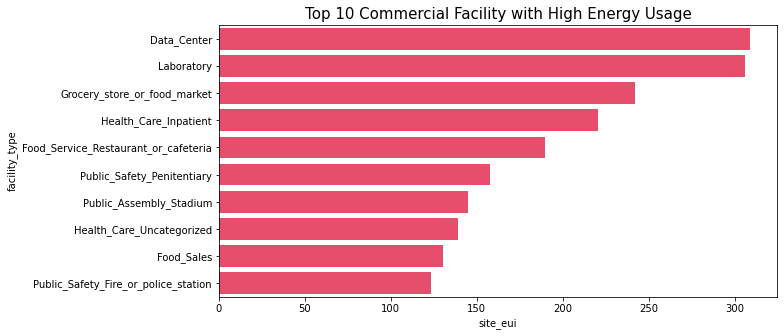

In [18]:
plt.figure(figsize = (10, 5))
sns.barplot(y='facility_type', x='site_eui', data=comm_temp, color = '#ff355d')
plt.title('Top 10 Commercial Facility with High Energy Usage', fontsize=15)
plt.show()

### Residential Facility Type Energy Usage

In [19]:
residential_temp = temp[temp['building_class'] == 'Residential']
res_temp = residential_temp.groupby("facility_type")['site_eui'].agg('median').reset_index().sort_values(by = ['site_eui'], 
                                                                                                              ascending = False)
res_temp

,facility_type,site_eui
4,Mixed_Use_Predominantly_Residential,84.125470
5,Multifamily_Uncategorized,80.389641
2,Mixed_Use_Commercial_and_Residential,71.094699
3,Mixed_Use_Predominantly_Commercial,45.986749
1,5plus_Unit_Building,32.113695
0,2to4_Unit_Building,27.721010


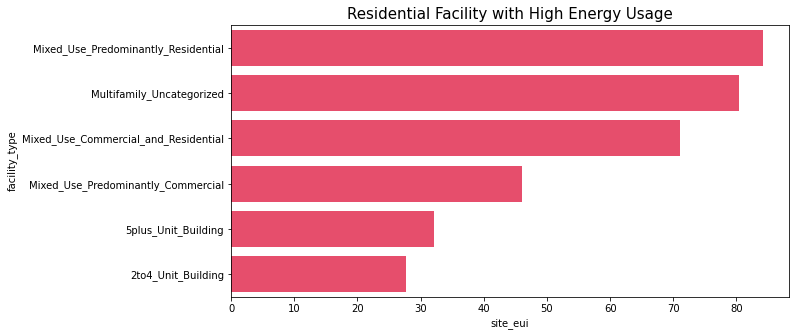

In [20]:
plt.figure(figsize = (10, 5))
sns.barplot(y='facility_type', x='site_eui', data=res_temp, color = '#ff355d')
plt.title('Residential Facility with High Energy Usage', fontsize=15)
plt.show()

### Median Energy Usage Intensity vs Energy Star Rating

In [21]:
energy_temp = df.groupby("energy_star_rating")["site_eui"].agg('median').reset_index()
energy_temp

,energy_star_rating,site_eui
0,0.0,288.839130
1,1.0,169.800368
2,2.0,132.836066
3,3.0,127.077056
4,4.0,122.240267
...,...,...
96,96.0,45.766319
97,97.0,42.015738
98,98.0,40.699422
99,99.0,35.901639


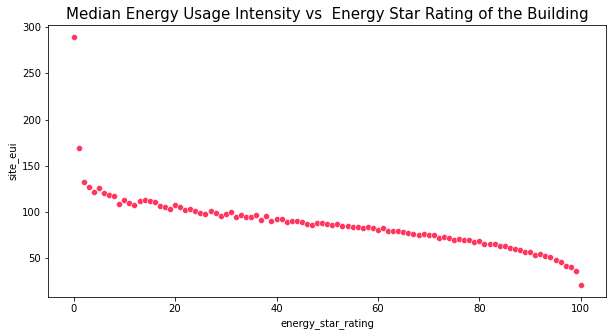

In [22]:
plt.figure(figsize = (10, 5))
sns.scatterplot(x=energy_temp["energy_star_rating"], y=energy_temp["site_eui"], color = '#ff355d')
plt.title('Median Energy Usage Intensity vs  Energy Star Rating of the Building', fontsize=15)
plt.show()

## Data Preparation

In [23]:
# Define X and y: 
X = df.drop(['id', 'site_eui'], axis=1)
y = df['site_eui']

In [24]:
# Create new variables matrix X_clean to store and clean the columns from X: 
X_clean = X.copy()
X_clean.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.0,1.0,NaN
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,NaN,1.0,12.0
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,NaN,1.0,12.0
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,NaN,1.0,12.0
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.0,1.0,NaN


### Handling missing values:

In [25]:
# Filling missing values:
X_clean['year_built'] = X['year_built'].replace(np.nan, 2022)
X_clean['energy_star_rating'] = X['energy_star_rating'].replace(np.nan, X['energy_star_rating'].mean())
X_clean['direction_max_wind_speed'] = X['direction_max_wind_speed'].replace(np.nan, 0)
X_clean['direction_peak_wind_speed'] = X['direction_peak_wind_speed'].replace(np.nan, 0)
X_clean['max_wind_speed'] = X['max_wind_speed'].replace(np.nan, 0)
X_clean['days_with_fog'] = X['days_with_fog'].replace(np.nan, 0)

In [26]:
# No missing values:
X_clean.isna().sum()

Year_Factor                  0
State_Factor                 0
building_class               0
facility_type                0
floor_area                   0
                            ..
days_above_110F              0
direction_max_wind_speed     0
direction_peak_wind_speed    0
max_wind_speed               0
days_with_fog                0
Length: 62, dtype: int64

### Handling categorical columns:

Strategies for categorical columns:
1. `facility_type`: Bin categories into related parent category, and create a new column `facility_category`, then drop.
2. `State_Factor` : Drop this column, and treat the data belonging onle one class 'USA'. 	
3. `building_class` :	One hot encode each category


#### Creating residential facility type parent categories:

In [27]:
df[df['building_class'] == 'Residential']['facility_type'].value_counts()

Multifamily_Uncategorized               39455
2to4_Unit_Building                       1893
5plus_Unit_Building                      1273
Mixed_Use_Commercial_and_Residential      672
Mixed_Use_Predominantly_Commercial        256
Mixed_Use_Predominantly_Residential         9
Name: facility_type, dtype: int64

3 parent categories will be created from all of the residential facilities:
   - Multifamily
   - Unit_Building
   - Mixed_Use

In [28]:
# Residential categories
cat1 = ['Multifamily', 'Unit_Building', 'Mixed_Use']

for c in cat1:
    print('CATEGORY: ', c)
    print(df[df['facility_type'].str.contains(c)]['facility_type'].value_counts())
    print('*****************************************')

CATEGORY:  Multifamily
Multifamily_Uncategorized    39455
Name: facility_type, dtype: int64
*****************************************
CATEGORY:  Unit_Building
2to4_Unit_Building     1893
5plus_Unit_Building    1273
Name: facility_type, dtype: int64
*****************************************
CATEGORY:  Mixed_Use
Mixed_Use_Commercial_and_Residential    672
Mixed_Use_Predominantly_Commercial      256
Mixed_Use_Predominantly_Residential       9
Name: facility_type, dtype: int64
*****************************************


#### Creating commercial facility type parent categories:

In [29]:
df[df['building_class'] == 'Commercial']['facility_type'].value_counts()

Office_Uncategorized                         12512
Education_Other_classroom                     3860
Lodging_Hotel                                 2098
Commercial_Other                              1744
Warehouse_Nonrefrigerated                     1255
Retail_Uncategorized                          1130
Education_College_or_university               1056
Nursing_Home                                   772
Education_Uncategorized                        709
Lodging_Dormitory_or_fraternity_sorority       669
Warehouse_Distribution_or_Shipping_center      604
Warehouse_Selfstorage                          577
Grocery_store_or_food_market                   448
Office_Medical_non_diagnostic                  447
Health_Care_Inpatient                          409
Religious_worship                              399
Industrial                                     384
Warehouse_Uncategorized                        330
Parking_Garage                                 251
Office_Bank_or_other_financial 

18 parent categories will be created from all of the commercial facilities:
   - Office
   - Education
   - Lodging
   - Commercial
   - Warehouse
   - Retail
   - Nursing
   - Grocery
   - Health
   - Religious
   - Industrial
   - Parking
   - Public_Assembly
   - Public_Safety
   - Service
   - Laboratory
   - Food
   - Data_Center

In [30]:
# Commercial categories
cat2 = ['Office', 'Education', 'Lodging', 'Commercial' , 'Warehouse', 'Retail', 'Nursing', 
       'Grocery', 'Health_Care', 'Religious', 'Industrial', 'Parking', 'Public_Assembly', 
       'Public_Safety', 'Service', 'Laboratory', 'Food', 'Data_Center']

for c in cat2:
    print('CATEGORY: ', c)
    print(df[df['facility_type'].str.startswith(c)]['facility_type'].value_counts())
    print('*****************************************')

CATEGORY:  Office
Office_Uncategorized              12512
Office_Medical_non_diagnostic       447
Office_Bank_or_other_financial      173
Office_Mixed_use                     18
Name: facility_type, dtype: int64
*****************************************
CATEGORY:  Education
Education_Other_classroom          3860
Education_College_or_university    1056
Education_Uncategorized             709
Education_Preschool_or_daycare      108
Name: facility_type, dtype: int64
*****************************************
CATEGORY:  Lodging
Lodging_Hotel                               2098
Lodging_Dormitory_or_fraternity_sorority     669
Lodging_Other                                 75
Lodging_Uncategorized                          5
Name: facility_type, dtype: int64
*****************************************
CATEGORY:  Commercial
Commercial_Other      1744
Commercial_Unknown      95
Name: facility_type, dtype: int64
*****************************************
CATEGORY:  Warehouse
Warehouse_Nonrefrigerated

In [31]:
# Creating 'facility_category' column 
X_clean['facility_category'] = df['facility_type']

for c in cat1:
    temp = X_clean[X_clean['facility_type'].str.contains(c)]
    idx = temp.index
    X_clean['facility_category'][idx] = c
    
    
for c in cat2:
    temp = X_clean[X_clean['facility_type'].str.startswith(c)]
    idx = temp.index
    X_clean['facility_category'][idx] = c

    
X_clean[['facility_type', 'facility_category']]

,facility_type,facility_category
0,Grocery_store_or_food_market,Grocery
1,Warehouse_Distribution_or_Shipping_center,Warehouse
2,Retail_Enclosed_mall,Retail
3,Education_Other_classroom,Education
4,Warehouse_Nonrefrigerated,Warehouse
...,...,...
75752,Office_Uncategorized,Office
75753,5plus_Unit_Building,Unit_Building
75754,Commercial_Other,Commercial
75755,Commercial_Other,Commercial


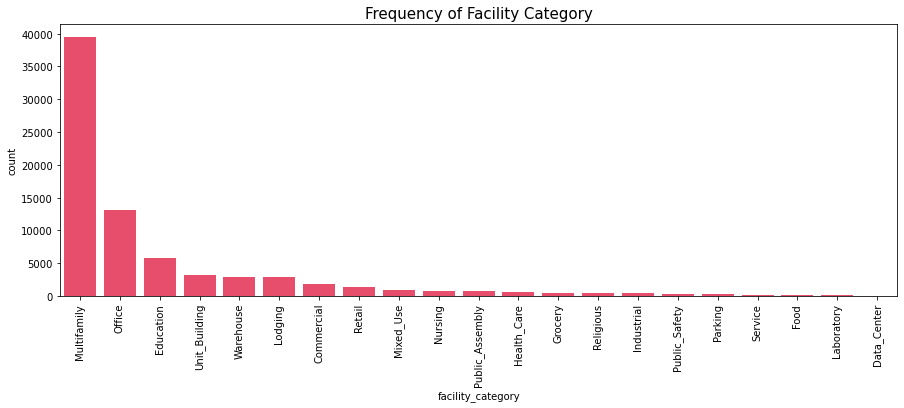

In [32]:
plt.figure(figsize = (15, 5))
sns.countplot(X_clean['facility_category'], color = '#ff355d', order = X_clean['facility_category'].value_counts().index)
plt.title('Frequency of Facility Category', fontsize=15)
plt.xticks(rotation = 90)
plt.show();

In [33]:
X_clean[['facility_type', 'facility_category']].describe()

,facility_type,facility_category
count,75757,75757
unique,60,21
top,Multifamily_Uncategorized,Multifamily
freq,39455,39455


By binning and creating a new column `facility_category`, we reduced 60 categories for facilities to 21 unique categories. We will drop `facility_type` column, and one hot encode `facility_category` column for modeling.

In [34]:
X_clean.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,facility_category
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.0,1.0,0.0,Grocery
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,0.0,1.0,12.0,Warehouse
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,0.0,1.0,12.0,Retail
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,0.0,1.0,12.0,Education
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.0,1.0,0.0,Warehouse


In [35]:
X_clean.drop(['State_Factor', 'facility_type'], axis=1, inplace = True)

In [36]:
X_clean.head()

,Year_Factor,building_class,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,facility_category
0,1,Commercial,61242.0,1942.0,11.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.0,1.0,0.0,Grocery
1,1,Commercial,274000.0,1955.0,45.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,0.0,1.0,12.0,Warehouse
2,1,Commercial,280025.0,1951.0,97.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,0.0,1.0,12.0,Retail
3,1,Commercial,55325.0,1980.0,46.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,0.0,1.0,12.0,Education
4,1,Commercial,66000.0,1985.0,100.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.0,1.0,0.0,Warehouse


In [37]:
X_clean['Year_Factor'].value_counts().sort_index()

1     2117
2     9058
3    10879
4    12946
5    18308
6    22449
Name: Year_Factor, dtype: int64

In [38]:
X_clean['year_built'].value_counts().sort_index()

0.0          6
1600.0       6
1649.0       4
1732.0       1
1756.0       4
          ... 
2012.0     353
2013.0     398
2014.0     269
2015.0     111
2022.0    1837
Name: year_built, Length: 181, dtype: int64

### Encoding and Scaling:

In [39]:
# Creating seperate column for each category:
X_clean_encoded = pd.get_dummies(X_clean)
X_clean_encoded.head()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,building_class_Commercial,building_class_Residential,facility_category_Commercial,facility_category_Data_Center,facility_category_Education,facility_category_Food,facility_category_Grocery,facility_category_Health_Care,facility_category_Industrial,facility_category_Laboratory,facility_category_Lodging,facility_category_Mixed_Use,facility_category_Multifamily,facility_category_Nursing,facility_category_Office,facility_category_Parking,facility_category_Public_Assembly,facility_category_Public_Safety,facility_category_Religious,facility_category_Retail,facility_category_Service,facility_category_Unit_Building,facility_category_Warehouse
0,1,61242.0,1942.0,11.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.0,1.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,274000.0,1955.0,45.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,0.0,1.0,12.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,280025.0,1951.0,97.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,0.0,1.0,12.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1,55325.0,1980.0,46.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,0.0,1.0,12.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,66000.0,1985.0,100.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.0,1.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [40]:
# Scaling the all columns:
scaler = MinMaxScaler()
X_cleaned_final = scaler.fit_transform(X_clean_encoded)

In [41]:
pd.DataFrame(X_cleaned_final)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81
0,0.0,0.009445,0.960435,0.110000,0.004557,0.808824,0.735725,0.530612,0.786885,0.720041,0.686275,0.803279,0.634093,0.642857,0.702703,0.444769,0.380952,0.657143,0.281684,0.416667,0.526316,0.180536,0.442308,0.405405,0.199511,0.365385,0.456522,0.143098,0.38,0.666667,0.302602,0.553191,0.674419,0.508277,0.489796,0.8125,0.628467,0.441860,0.866667,0.670628,0.659091,0.023242,0.340194,0.154053,0.000000,0.000000,0.380665,0.000000,0.000000,0.0,0.0,0.053846,0.000000,0.0,0.0,0.002778,0.002778,0.042918,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.042769,0.966864,0.450000,0.004247,0.808824,0.735725,0.530612,0.786885,0.720041,0.686275,0.803279,0.634093,0.642857,0.702703,0.444769,0.380952,0.657143,0.281684,0.416667,0.526316,0.180536,0.442308,0.405405,0.199511,0.365385,0.456522,0.143098,0.38,0.666667,0.302602,0.553191,0.674419,0.508277,0.489796,0.8125,0.628467,0.441860,0.866667,0.670628,0.659091,0.023242,0.340194,0.154053,0.000000,0.000000,0.380665,0.000000,0.000000,0.0,0.0,0.053846,0.000000,0.0,0.0,0.002778,0.000000,0.042918,0.038585,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.043713,0.964886,0.970000,0.004247,0.808824,0.735725,0.530612,0.786885,0.720041,0.686275,0.803279,0.634093,0.642857,0.702703,0.444769,0.380952,0.657143,0.281684,0.416667,0.526316,0.180536,0.442308,0.405405,0.199511,0.365385,0.456522,0.143098,0.38,0.666667,0.302602,0.553191,0.674419,0.508277,0.489796,0.8125,0.628467,0.441860,0.866667,0.670628,0.659091,0.023242,0.340194,0.154053,0.000000,0.000000,0.380665,0.000000,0.000000,0.0,0.0,0.053846,0.000000,0.0,0.0,0.002778,0.000000,0.042918,0.038585,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.008518,0.979228,0.460000,0.004247,0.808824,0.735725,0.530612,0.786885,0.720041,0.686275,0.803279,0.634093,0.642857,0.702703,0.444769,0.380952,0.657143,0.281684,0.416667,0.526316,0.180536,0.442308,0.405405,0.199511,0.365385,0.456522,0.143098,0.38,0.666667,0.302602,0.553191,0.674419,0.508277,0.489796,0.8125,0.628467,0.441860,0.866667,0.670628,0.659091,0.023242,0.340194,0.154053,0.000000,0.000000,0.380665,0.000000,0.000000,0.0,0.0,0.053846,0.000000,0.0,0.0,0.002778,0.000000,0.042918,0.038585,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.010190,0.981701,1.000000,0.004557,0.808824,0.735725,0.530612,0.786885,0.720041,0.686275,0.803279,0.634093,0.642857,0.702703,0.444769,0.380952,0.657143,0.281684,0.416667,0.526316,0.180536,0.442308,0.405405,0.199511,0.365385,0.456522,0.143098,0.38,0.666667,0.302602,0.553191,0.674419,0.508277,0.489796,0.8125,0.628467,0.441860,0.866667,0.670628,0.659091,0.023242,0.340194,0.154053,0.000000,0.000000,0.380665,0.000000,0.000000,0.0,0.0,0.053846,0.000000,0.0,0.0,0.002778,0.002778,0.042918,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75752,1.0,0.003049,0.986647,0.080000,0.022269,0.691176,0.605082,0.285714,0.770492,0.663793,0.509804,0.721311,0.535268,0.428571,0.675676,0.467173,0.642857,0.628571,0.348195,0.500000,0.447368,0.267043,0.461538,0.459459,0.306189,0.423077,0.456522,0.311946,0.50,0.461538,0.213145,0.319149,0.488372,0.297092,0.183673,0.7500,0.559800,0.418605,0.666667,0.387946,0.204545,0.052546,0.448015,0.418145,0.010998,0.000774,0.324909,0.035294,0.000000,0.0,0.0,0.096154,0.016216

## Modeling

In [42]:
# Train - Test Set split:
X_tr, X_test, y_tr, y_test = train_test_split(X_clean, y, test_size = 0.1, random_state=42)

# Train - Validation Set Split
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size = 0.2, random_state=42)

In [43]:
print('Training dataset shape: ', X_train.shape, y_train.shape)
print('Validation dataset shape: ', X_val.shape, y_val.shape)
print('Test dataset shape: ', X_test.shape, y_test.shape)

Training dataset shape:  (54544, 61) (54544,)
Validation dataset shape:  (13637, 61) (13637,)
Test dataset shape:  (7576, 61) (7576,)


## Evaluation